<a href="https://colab.research.google.com/github/Nahmadid/Deep_learning/blob/main/HW4_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Question 1**
Using the auto-differentiation routine provided by any one of the frameworks (TensorFlow or PyTorch, or JAX), write codes for computing the derivative of the following Gaussian function in both frameworks:

\begin{equation}
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right), \quad \sigma^2 = 0.2, \mu = 0, x \in [-5, 5].
\end{equation}

Using the time module provided by Python measure the run-times for the code at least 10 times to obtain a measure of unbiased performance. Try it for both CPU and GPU, and report the CPU and GPU you used (For example- CPU: Intel Core i9-10900X / GPU: GeForce RTX 3090 Ti). Plot the run-time against the number of runs and compute the mean and standard deviation of the measured run-times. (Note: Use the same hardware for all the following problems.)


In [36]:
# !pip install --upgrade jax jaxlib
# !nvidia-smi
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres


#**Type of Processor:CPU**

Processor: Intel(R) Xeon(R) CPU @ 2.20GHz

0.021178009
0.029860497


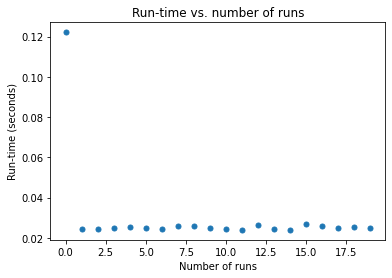

In [35]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from timeit import default_timer as timer
import time
import matplotlib.pyplot as plt


    
def gaussian(x, mu, sigma):
    return jnp.exp(-(x - mu)**2 / (2 * sigma**2)) / jnp.sqrt(2 * jnp.pi * sigma**2)

def d2f(x, mu, sigma):
    f = lambda x: gaussian(x, mu, sigma)
    df = grad(f)
    d2f = grad(df)
    return vmap(d2f)(x)

# Define parameters of Gaussian function
mu = 0
sigma = jnp.sqrt(0.2)

# Generate 10000 uniformly-spaced points in [-5, 5]
x = jnp.linspace(-5, 5, 20)


num_runs = 20
y_vals = []
for i in range(num_runs):
    start_time = time.time()
    y = d2f(x,mu,sigma)
    end_time = time.time()
    y_vals.append(end_time - start_time)

mean_time = jnp.mean(jnp.array(y_vals))
std_dev = jnp.std(jnp.array(y_vals))

print(std_dev)
print(mean_time)

plt.errorbar(range(num_runs), y_vals, fmt='o', markersize=5)
plt.xlabel("Number of runs")
plt.ylabel("Run-time (seconds)")
plt.title("Run-time vs. number of runs")
plt.show()

____________________________

#**GPU or CPU?**
Whether the GPU runs this code faster than the CPU depends on the availability of a GPU and the size of the input data.

JAX has the ability to compile functions using a just-in-time (JIT) compiler, which can significantly speed up calculations. In this code, the jit decorator is used to compile the d2f function. JIT compilation is usually faster on the GPU than on the CPU because GPUs are optimized for parallel computations, and the JAX library is specifically designed to take advantage of GPU hardware.

If you have access to a GPU and you're running this code on a large dataset, you will likely see a significant speedup compared to running it on a CPU. However, if the input data is small, the overhead of transferring data to the GPU may outweigh the benefits of using the GPU, and you may not see a significant speedup.

To check if a GPU is available in your Colab environment, you can run the following code:



> import jax

> jax.device_count()


This will return the number of available accelerator devices (CPU and/or GPU). If you have at least one GPU available, JAX will automatically use it for computations by default.

In [8]:
import jax
jax.device_count()

1

In [4]:
!nvidia-smi

Mon Mar 13 17:27:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    30W /  70W |    105MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


#**Type of Processor:GPU**

GPU Name: Tesla T4
Driver Version: 525.85.12
CUDA Version: 12.0
Memory: 15360 MiB

.

.

.

the std_dev is: 0.2826058566570282
the mean is: 0.09660768508911133


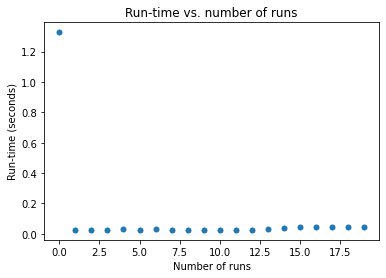

In [7]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from timeit import default_timer as timer
import time
import matplotlib.pyplot as plt


    
def gaussian(x, mu, sigma):
    return jnp.exp(-(x - mu)**2 / (2 * sigma**2)) / jnp.sqrt(2 * jnp.pi * sigma**2)

def d2f(x, mu, sigma):
    f = lambda x: gaussian(x, mu, sigma)
    df = grad(f)
    d2f = grad(df)
    return vmap(d2f)(x)

# Define parameters of Gaussian function
mu = 0
sigma = jnp.sqrt(0.2)

# Generate 10000 uniformly-spaced points in [-5, 5]
x = jnp.linspace(-5, 5, 20)


num_runs = 20
y_vals = []
for i in range(num_runs):
    start_time = time.time()
    y = d2f(x,mu,sigma)
    end_time = time.time()
    y_vals.append(end_time - start_time)

mean_time = jnp.mean(jnp.array(y_vals))
std_dev = jnp.std(jnp.array(y_vals))

print(f"the std_dev is: {std_dev}")
print(f"the mean is: {mean_time}")

plt.errorbar(range(num_runs), y_vals, fmt='o', markersize=5)
plt.xlabel("Number of runs")
plt.ylabel("Run-time (seconds)")
plt.title("Run-time vs. number of runs")
plt.show()